In [3]:
from fbprophet import Prophet
import pandas as pd

In [4]:
data = pd.read_csv('../../data/BTCUSDT-1h-data.csv')

In [5]:
data.loc[:,'ds'] = pd.to_datetime(data.timestamp)
data.loc[:,'y'] = data.close

In [6]:
model = Prophet()

In [7]:
model.fit(data)

SystemError: <class 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_2191827911836288369.PyStanHolder'> returned a result with an error set

In [16]:
data.timestamp.max()

'2021-01-12 19:00:00'

In [41]:
future = model.make_future_dataframe(12, freq='H')

In [42]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17790,2021-01-13 03:00:00,39830.329206,39048.565671,40550.639051
17791,2021-01-13 04:00:00,39860.681449,39128.572090,40668.674509
17792,2021-01-13 05:00:00,39892.571372,39128.339641,40608.775442
17793,2021-01-13 06:00:00,39926.966182,39127.231662,40678.385129
17794,2021-01-13 07:00:00,39962.954285,39188.450805,40747.157745


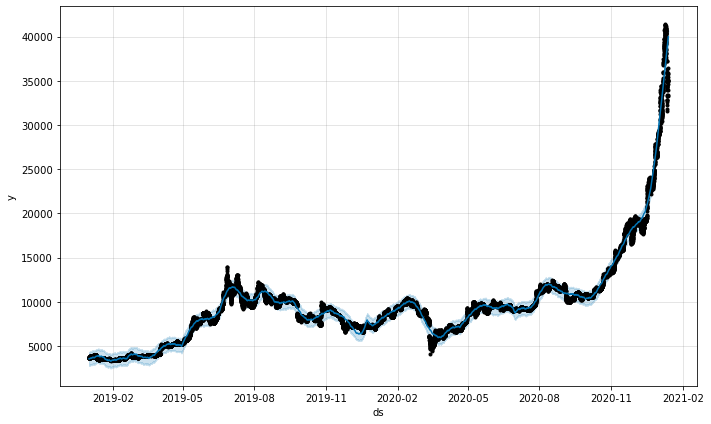

In [43]:
fig1 = model.plot(forecast)

In [46]:
pd.set_option('display.max_columns', 100)

In [53]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
daily                                float64
daily_lower                          float64
daily_upper                          float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: obj

In [68]:
result = pd.merge(data[['ds','close']], forecast, left_on='ds', right_on='ds').set_index('ds')

<AxesSubplot:xlabel='ds'>

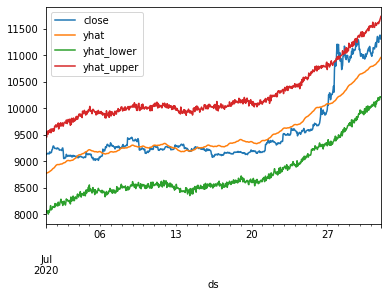

In [73]:
result.loc[(result.index.year == 2020) & (result.index.month == 7), ['close','yhat', 'yhat_lower', 'yhat_upper']].plot()

## Phrofet for MA

In [9]:
from core.trade_service.instruments.moving_averages import MA

In [37]:
data['ma_14'] = MA('close', 14).evaluate(data)
data['ma_25'] = MA('close', 25).evaluate(data)

<ipython-input-37-ff21a5da81ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ma_14'] = MA('close', 14).evaluate(data)
<ipython-input-37-ff21a5da81ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ma_25'] = MA('close', 25).evaluate(data)


In [14]:
data = data.dropna()

In [16]:
data.loc[:,'ds'] = pd.to_datetime(data.timestamp)
data.loc[:,'y'] = data.ma_14

/Users/guidosidoni/opt/anaconda3/envs/CryptoTrade/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
model = Prophet()

In [20]:
model.fit(data)

In [25]:
future = model.make_future_dataframe(12, freq='H')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18137,2021-01-28 03:00:00,34739.787609,33702.248665,35830.217977
18138,2021-01-28 04:00:00,34738.903041,33703.323533,35715.505879
18139,2021-01-28 05:00:00,34737.314813,33638.554640,35757.706615
18140,2021-01-28 06:00:00,34736.734909,33737.382461,35725.361332
18141,2021-01-28 07:00:00,34737.454433,33646.341605,35723.546373


In [38]:
result = pd.merge(data[['ds','ma_14','ma_25','close']], forecast, left_on='ds', right_on='ds').set_index('ds')

<AxesSubplot:xlabel='ds'>

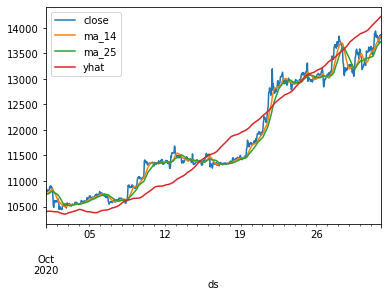

In [40]:
result.loc[(result.index.year == 2020) & (result.index.month == 10), ['close','ma_14','ma_25','yhat']].plot()